# Creating synthetic data defined from Gaussian distribution

### Things to look into : 
1. Implementing Laplace Method
2. Model uncertainties in BNN and BSSNN (run through predictions multiple times)
3. Attempting different values of \rho for BSSNN and looking at performance / KL divergence evolution

In [49]:
# PyTorch Imports
import torch
import torch.nn as nn
from torch.nn import Module
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Normal

# Basic Python Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sys  


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Module Imports
from Modules.BayesLinear import BayesLinear, BLSS
from Modules.Loss import BKLLoss


import random
from sklearn.preprocessing import StandardScaler

random.seed(10)

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/1370017188.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


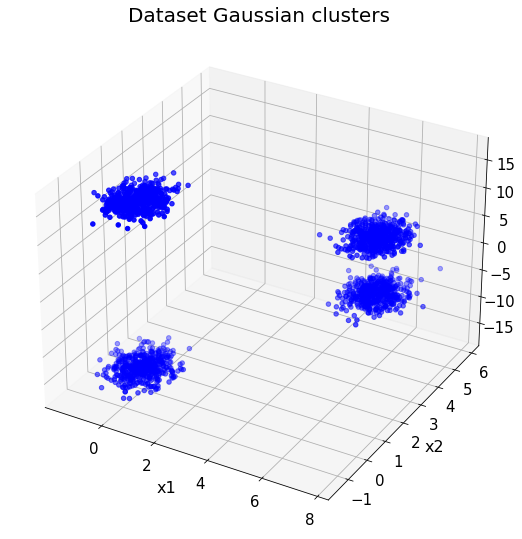

In [50]:
#center_locations = [[8, 8], [8, 4], [2, 8], [2, 4]]
center_locations = [[0, 0], [4, 6]]
X1, y_true = make_blobs(n_samples=2000, centers=center_locations,
                       cluster_std=0.50, random_state=0)
X1 = X1[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X1).predict(X1)

# Create gaussian distributed labels
mu = [-5, 5, -15, 15]
sigma = [0.5, 0.5, 0.5, 0.5]

labels = labels.astype(float)
labels0 = np.where(labels==0)[0]
labels1 = np.where(labels==1)[0]

assert len(labels0) == len(labels1), 'Error : Clusters do not have the same number of samples'
n = len(labels0)

size1 = labels0[0:int(n/2)]
size2 = labels0[int(n/2):n]
size3 = labels1[0:int(n/2)]
size4 = labels1[int(n/2):n]

s1 = np.random.normal(loc=mu[0], scale=sigma[0], size=len(size1))
s2 = np.random.normal(mu[1], sigma[1], len(size2))
s3 = np.random.normal(mu[2], sigma[2], len(size3))
s4 = np.random.normal(mu[3], sigma[3], len(size4))

#replace categorical labels with distribution
labels[size1] = s1
labels[size2] = s2
labels[size3] = s3
labels[size4] = s4

# plot 3D scatter data.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X1[:, 0], X1[:, 1], labels, color='b')
plt.grid()
plt.title('Dataset Gaussian clusters', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/1698179518.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


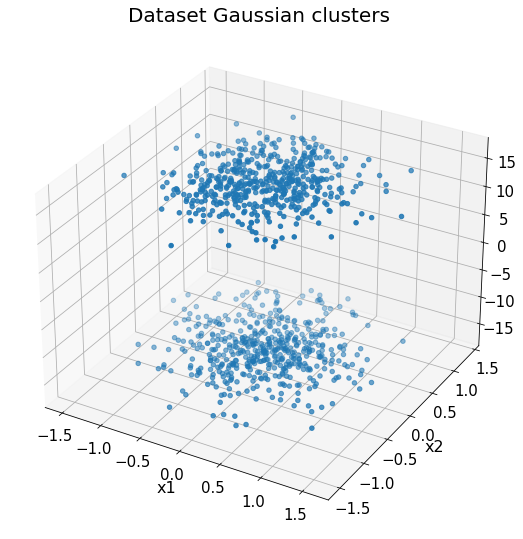

In [51]:
#center_locations = [[8, 8], [8, 4], [2, 8], [2, 4]]
center_locations = [[0, 0], [4, 6]]
X2, y_true = make_blobs(n_samples=2000, centers=center_locations,
                       cluster_std=0.50, random_state=0)
X2 = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X2).predict(X2)

# Create gaussian distributed labels
mu = [-5, 5, -15, 15]
sigma = [0.5, 0.5, 0.5, 0.5]

labels = labels.astype(float)
labels0 = np.where(labels==0)[0]
labels1 = np.where(labels==1)[0]

assert len(labels0) == len(labels1), 'Error : Clusters do not have the same number of samples'
n = len(labels0)

size1 = labels0[0:int(n/2)]
size2 = labels0[int(n/2):n]
size3 = labels1[0:int(n/2)]
size4 = labels1[int(n/2):n]

s1 = np.random.normal(loc=mu[0], scale=sigma[0], size=len(size1))
s2 = np.random.normal(mu[1], sigma[1], len(size2))
s3 = np.random.normal(mu[2], sigma[2], len(size3))
s4 = np.random.normal(mu[3], sigma[3], len(size4))

#replace categorical labels with distribution
labels[size1] = s1
labels[size2] = s2
labels[size3] = s3
labels[size4] = s4

# plot 3D scatter data.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X2[labels1, 0], X2[labels1, 1], labels[labels1])
plt.grid()
plt.title('Dataset Gaussian clusters', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/2245236470.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


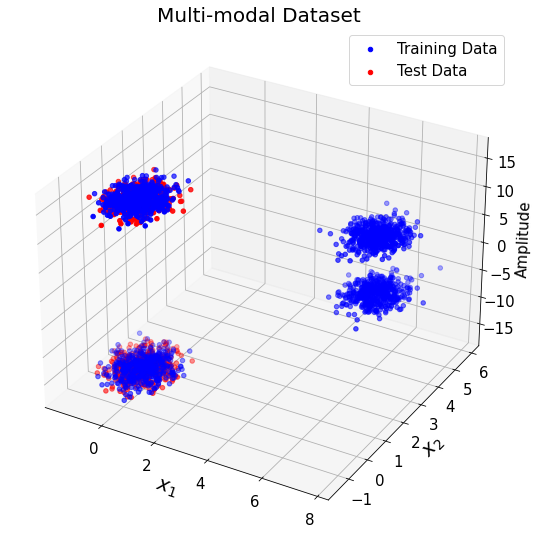

In [64]:
# plot 3D scatter data.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X1[:, 0], X1[:, 1], labels, color='b', label='Training Data')
ax.scatter(X2[labels1, 0], X2[labels1, 1], labels[labels1], color='r', label='Test Data')
plt.grid()
plt.title('Multi-modal Dataset', fontsize=20)
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
ax.set_zlabel('Amplitude', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.savefig('MultimodalData')
plt.show()

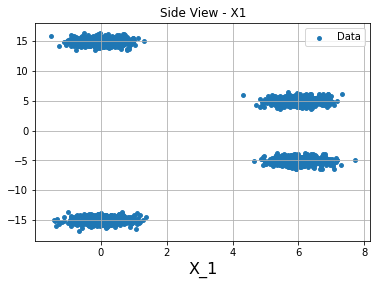

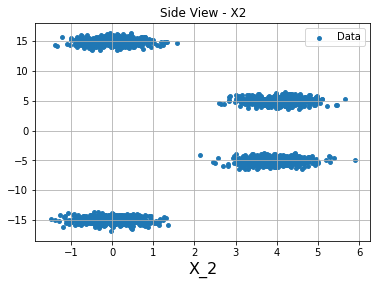

In [33]:
plt.figure()
plt.scatter(X[:, 0], labels, s=15, label='Data', color='b')
plt.title('Data Overview', fontsize=20)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.scatter(X[:, 1], labels, s=15, label='Data', color='b')
plt.title('Data Overview', fontsize=20)
plt.xlabel('$x_2$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.show()

In [34]:
xx = X.copy()
x = torch.from_numpy(xx)
y = torch.from_numpy(labels)

x = x.float()
y = y.float()

## Feed-Forward Neural Network
Skal FFNN kun have en feature i output (middelværdi), eller skal vi også bestemmelse normalfordeling for data usikkerheder med denne model, for at sammenligne med BNN (ergo have 2 output features)?

In [35]:
class DenseLinear(Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(DenseLinear, self).__init__()
        self.hidden1 = nn.Linear(in_features=n_feature, out_features=n_hidden, bias=True)
        self.hidden2 = nn.Linear(in_features=n_hidden, out_features=n_hidden, bias=True)
        self.predict = nn.Linear(in_features=n_hidden, out_features=n_output, bias=True)
        
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.predict(x)

        return x
    
FFNN = DenseLinear(n_feature=2, n_hidden=100, n_output=1)
print(FFNN)

DenseLinear(
  (hidden1): Linear(in_features=2, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=100, bias=True)
  (predict): Linear(in_features=100, out_features=1, bias=True)
)


### Training

In [36]:
n_epochs = 1000 # or whatever
batch_size = 64 # or whatever

FFNN = FFNN.float()
mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

mse_epoch = []
mae_epoch = []
optimizer = optim.Adam(FFNN.parameters(),  lr=0.001)

for epoch in range(n_epochs):

    # Randomly permute indexes
    permutation = torch.randperm(x.size()[0])

    # Run batch
    count = 0
    mse_all = 0
    mae_all = 0
    
    for i in range(0, x.size()[0], batch_size):
        count +=1
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        
        batch_x, batch_y = x[indices], y[indices]
        
        prediction = FFNN(batch_x)
        
        loss = mse_loss(prediction.squeeze(), batch_y.float())
        mse_all += mse_loss(prediction.squeeze(), batch_y.float())
        mae_all += mae_loss(prediction.squeeze(), batch_y.float())
        
        loss.backward()
        
        optimizer.step()
   
    mse_epoch.append(mse_all/count)
    mae_epoch.append(mae_all/count)
    # print(mse_epoch)
        
    if epoch % 100 == 0:
        print('Epoch', epoch, '    Loss', loss.item())

Epoch 0     Loss 156.3270263671875
Epoch 100     Loss 145.93685913085938
Epoch 200     Loss 129.46726989746094
Epoch 300     Loss 141.5763397216797
Epoch 400     Loss 114.20745086669922
Epoch 500     Loss 99.58741760253906
Epoch 600     Loss 124.77910614013672
Epoch 700     Loss 127.3284683227539
Epoch 800     Loss 125.38348388671875
Epoch 900     Loss 79.64701843261719


In [37]:
print('MSE Loss :', min(mse_epoch))
print('MAE Loss :', min(mae_epoch))

MSE Loss : tensor(110.3720, grad_fn=<DivBackward0>)
MAE Loss : tensor(9.1218, grad_fn=<DivBackward0>)


### Predictions

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/1595125204.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


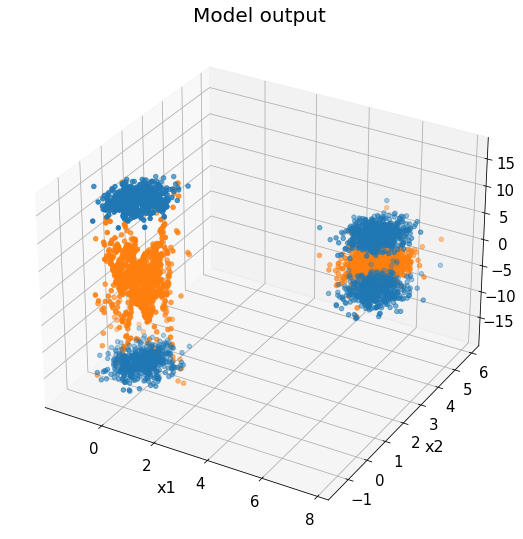

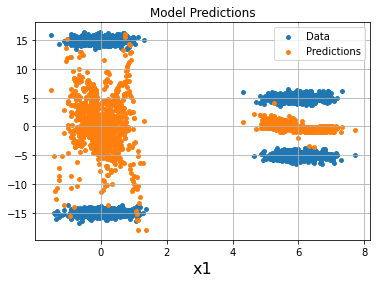

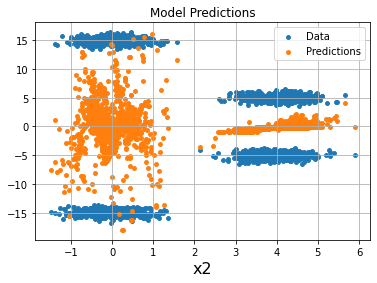

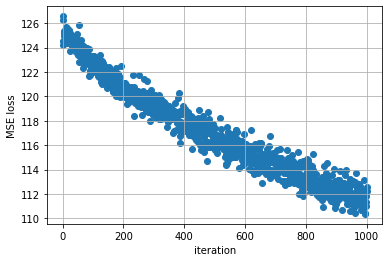

In [38]:
prediction = FFNN(x.float()).detach().numpy()

fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], labels, label='Data')
ax.scatter(X[:, 0], X[:, 1], prediction, label='Predictions')
plt.grid()
plt.title('Model output', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()


plt.figure()
plt.scatter(X[:, 0], y, s=15, label='Data')
plt.scatter(X[:, 0], prediction, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x1', fontsize=16)
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.scatter(X[:, 1], y, s=15, label='Data')
plt.scatter(X[:, 1], prediction, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x2', fontsize=16)
plt.grid()
plt.legend()
plt.show()

mse_losses = [mse.detach().numpy() for mse in mse_epoch]
iterations = np.linspace(0, len(mse_losses), len(mse_losses))
plt.figure()
plt.scatter(iterations, mse_losses)
plt.ylabel('MSE loss')
plt.xlabel('iteration')
plt.grid()
plt.show()


## Bayes Linear Neural Network

In [39]:
class BayesLinearNN(Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(BayesLinearNN, self).__init__()
        self.hidden1 = BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_feature, out_features=n_hidden, bias=True)   # hidden layer
        self.hidden2 = BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_hidden, out_features=n_hidden, bias=True)
        self.predict = BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=n_hidden, out_features=n_output, bias=True)   # output layer
        
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = self.predict(x)
        
        #mu, log_std = x.chunk(2, dim=1)
        
        #dist = Normal(mu, torch.exp(log_std))

        return x
    
BNN = BayesLinearNN(n_feature=2, n_hidden=100, n_output=1)
print(BNN)

BayesLinearNN(
  (hidden1): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2, out_features=100, bias=True)
  (hidden2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=100, bias=True)
  (predict): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1, bias=True)
)


### Training

In [40]:
n_epochs = 5000 # or whatever
batch_size = 64 # or whatever

BNN = BNN.float()

kl_loss = BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(BNN.parameters(),  lr=0.001)
mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

mse_epoch = []
mae_epoch = []
kl_epoch = []
ELBO_epoch = []

for epoch in range(n_epochs):

    # Randomly permute indexes
    permutation = torch.randperm(x.size()[0])

    # Run batch
    count = 0
    mse_all = 0
    mae_all = 0
    kl_all = 0
    ELBO_all = 0
    
    for i in range(0, x.size()[0], batch_size):
        count += 1
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        
        batch_x, batch_y = x[indices], y[indices]
        
        #distribution = BNN(batch_x)
        prediction = BNN(batch_x)
        
        kl = kl_loss(BNN)
        
        #loss = -distribution.log_prob(batch_y.float()).sum(1).mean() + kl_weight*kl
        loss = mse_loss(prediction.squeeze(), batch_y.float()) + kl_weight*kl      
        
        mse_all += mse_loss(prediction.squeeze(), batch_y.float())
        mae_all += mae_loss(prediction.squeeze(), batch_y.float())
        kl_all += kl
        ELBO_all += loss
        
        loss.backward()
        
        optimizer.step()
    
    mse_epoch.append(mse_all/count)  
    mae_epoch.append(mae_all/count)
    kl_epoch.append(kl_all/count)
    ELBO_epoch.append(ELBO_all/count)
    
    if epoch % 500 == 0:
        print('Epoch', epoch, '    Loss', loss.item())

Epoch 0     Loss 121.29306030273438
Epoch 500     Loss 114.2572250366211
Epoch 1000     Loss 148.88536071777344
Epoch 1500     Loss 118.04090118408203
Epoch 2000     Loss 97.08638763427734
Epoch 2500     Loss 80.23063659667969
Epoch 3000     Loss 98.47003936767578
Epoch 3500     Loss 64.0599136352539
Epoch 4000     Loss 54.16193771362305
Epoch 4500     Loss 77.75516510009766


### Predictions

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/1539862087.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


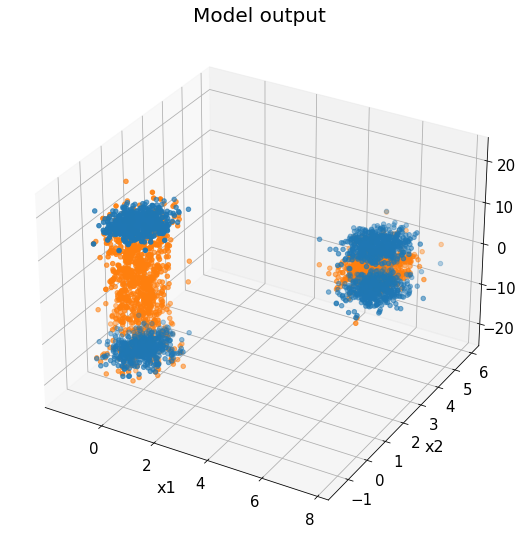

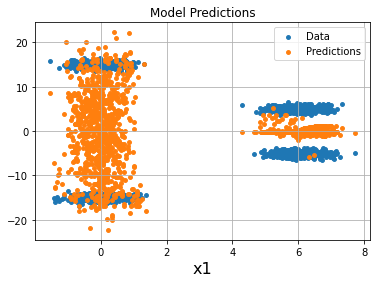

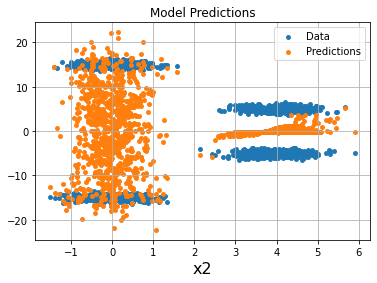

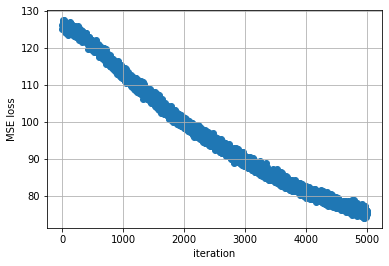

In [41]:
prediction = BNN(x.float()).detach().numpy()

fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], labels, label='Data')
ax.scatter(X[:, 0], X[:, 1], prediction, label='Predictions')
plt.grid()
plt.title('Model output', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

plt.figure()
plt.scatter(X[:, 0], y, s=15, label='Data')
plt.scatter(X[:, 0], prediction, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x1', fontsize=16)
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.scatter(X[:, 1], y, s=15, label='Data')
plt.scatter(X[:, 1], prediction, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x2', fontsize=16)
plt.grid()
plt.legend()
plt.show()

mse_losses = [mse.detach().numpy() for mse in mse_epoch]
iterations = np.linspace(0, len(mse_losses), len(mse_losses))
plt.figure()
plt.scatter(iterations, mse_losses)
plt.ylabel('MSE loss')
plt.xlabel('iteration')
plt.grid()
plt.show()

## Spectral Smoothing
Only done for gradient computations during training.
We must reparametrise the inputs to the Gaussian distributions (\mu and \sigma) by applying an opertator from the OU semigroup. This created a correlated variable. 

In [42]:
class BayesLinearSpectralSmoothing(Module):
    def __init__(self, rho, n_feature, n_hidden, n_output):
        super(BayesLinearSpectralSmoothing, self).__init__()
        self.hidden1 = BLSS(rho=rho, prior_mu=0, prior_sigma=0.1, in_features=n_feature, out_features=n_hidden, bias=True)   # hidden layer
        self.hidden2 = BLSS(rho=rho, prior_mu=0, prior_sigma=0.1, in_features=n_hidden, out_features=n_hidden, bias=True)
        self.predict = BLSS(rho=rho, prior_mu=0, prior_sigma=0.1, in_features=n_hidden, out_features=n_output, bias=True)   # output layer
        
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = self.predict(x)

        return x
    
BSSNN = BayesLinearSpectralSmoothing(rho=0.1, n_feature=2, n_hidden=100, n_output=1)
print(BSSNN)

BayesLinearSpectralSmoothing(
  (hidden1): BLSS(prior_mu=0, prior_sigma=0.1, in_features=2, out_features=100, bias=True)
  (hidden2): BLSS(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=100, bias=True)
  (predict): BLSS(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1, bias=True)
)


In [43]:
n_epochs = 5000 # or whatever
batch_size = 64 # or whatever

BSSNN = BSSNN.float()

kl_loss = BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(BSSNN.parameters(),  lr=0.001)
mse_loss = nn.MSELoss()
mse_all = []

for epoch in range(n_epochs):

    # Randomly permute indexes
    permutation = torch.randperm(x.size()[0])

    # Run batch
    count = 0
    mse_all = 0
    for i in range(0, x.size()[0], batch_size):
        count += 1
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        
        batch_x, batch_y = x[indices], y[indices]
        
        #distribution = BNN(batch_x)
        prediction = BSSNN(batch_x)
        
        kl = kl_loss(BSSNN)
        
        #loss = -distribution.log_prob(batch_y.float()).sum(1).mean() + kl_weight*kl
        loss = mse_loss(prediction.squeeze(), batch_y.float()) + kl_weight*kl

        mse_all += mse_loss(prediction.squeeze(), batch_y.float())
        
        loss.backward()
        
        optimizer.step()
    
    mse_epoch.append(mse_all/count)  
        
    if epoch % 500 == 0:
        print('Epoch', epoch, '    Loss', loss.item())

Epoch 0     Loss 138.53665161132812
Epoch 500     Loss 112.87965393066406
Epoch 1000     Loss 129.68197631835938
Epoch 1500     Loss 115.68158721923828
Epoch 2000     Loss 68.7920150756836
Epoch 2500     Loss 82.75312805175781
Epoch 3000     Loss 66.5772933959961
Epoch 3500     Loss 94.65512084960938
Epoch 4000     Loss 30.539731979370117
Epoch 4500     Loss 69.08919525146484


/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/2874943887.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


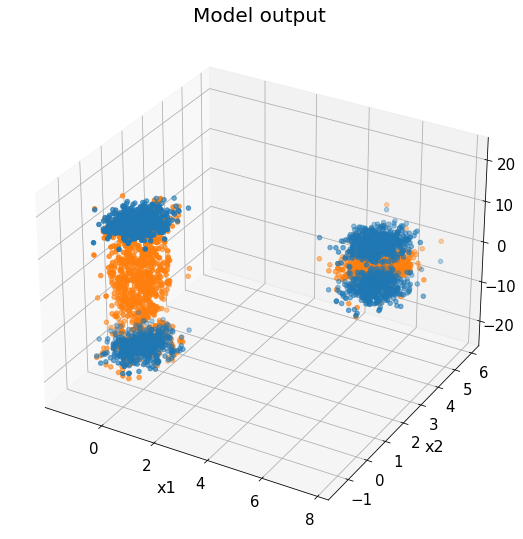

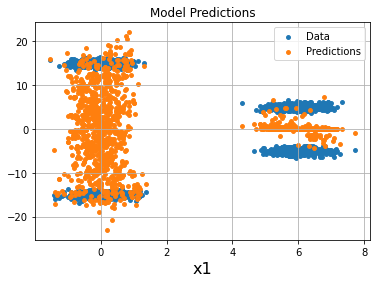

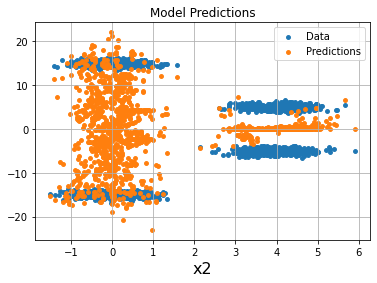

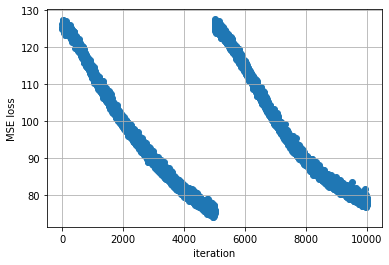

In [44]:
prediction_01 = BSSNN(x.float()).detach().numpy()
# prediction_09 = BSSNN(x.float()).detach().numpy()

fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], labels, label='Data')
ax.scatter(X[:, 0], X[:, 1], prediction_01, label='Predictions')
plt.grid()
plt.title('Model output', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

plt.figure()
plt.scatter(X[:, 0], y, s=15, label='Data')
plt.scatter(X[:, 0], prediction_01, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x1', fontsize=16)
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.scatter(X[:, 1], y, s=15, label='Data')
plt.scatter(X[:, 1], prediction_01, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('x2', fontsize=16)
plt.grid()
plt.legend()
plt.show()

mse_losses = [mse.detach().numpy() for mse in mse_epoch]
iterations = np.linspace(0, len(mse_losses), len(mse_losses))
plt.figure()
plt.scatter(iterations, mse_losses)
plt.ylabel('MSE loss')
plt.xlabel('iteration')
plt.grid()
plt.show()

## Laplace Transform

In [45]:
from laplace import Laplace

n_epochs = 50000 # or whatever
batch_size = 64 # or whatever

from torch.utils.data import DataLoader, TensorDataset
batch_size = 64
train_loader = DataLoader(TensorDataset(x, y), batch_size=batch_size)
model = FFNN
n_feature = 2
n_hidden = 100
n_output = 1
model = torch.nn.Sequential(nn.Linear(in_features=n_feature, out_features=n_hidden, bias=True),
                            torch.nn.ReLU(),
                            nn.Linear(in_features=n_hidden, out_features=n_hidden, bias=True),
                            torch.nn.ReLU(),
                            nn.Linear(in_features=n_hidden, out_features=n_output, bias=True))

mse_loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(),  lr=0.001)
for i in range(n_epochs):
    # Run batch
    for x_train, y_train in train_loader:
        optimizer.zero_grad()
        prediction = model(x_train.float())     # input x and predict based on x
        mse = mse_loss(prediction.squeeze(), y_train.squeeze().float())
        mse.backward()
        optimizer.step()

# User-specified LA flavor
la = Laplace(model, 'regression',
             subset_of_weights='all',
             hessian_structure='diag')

la.fit(train_loader)

log_prior, log_sigma = torch.ones(1, requires_grad=True), torch.ones(1, requires_grad=True)

hyper_optimizer = torch.optim.Adam([log_prior, log_sigma], lr=1e-1)

for i in range(n_epochs):
    hyper_optimizer.zero_grad()
    neg_marglik = - la.log_marginal_likelihood(log_prior.exp(), log_sigma.exp())
    neg_marglik.backward()
    hyper_optimizer.step()

/Users/oliverdurfeldtpedros/Documents/PythonEnv/DeepLearning/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/oliverdurfeldtpedros/Documents/PythonEnv/DeepLearning/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [46]:
f_mu, f_var = la(x)
mse = mse_loss(f_mu, y_train.squeeze().float())

f_mu = f_mu.squeeze().detach().numpy()
f_sigma = f_var.squeeze().sqrt().numpy()

pred_std = np.sqrt(f_sigma**2 + la.sigma_noise.item()**2)

print(f_mu.size)
print(X[:, 0].size)

2000
2000


/Users/oliverdurfeldtpedros/Documents/PythonEnv/DeepLearning/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/987516748.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


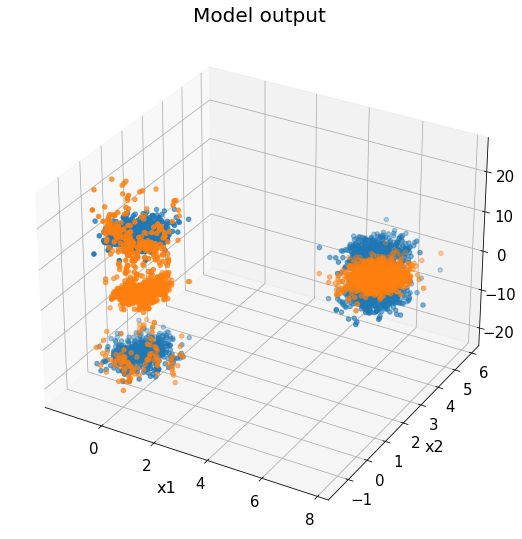

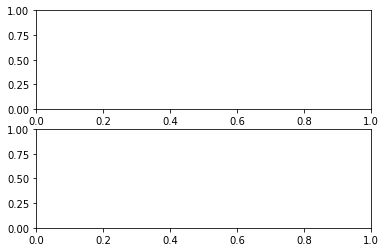

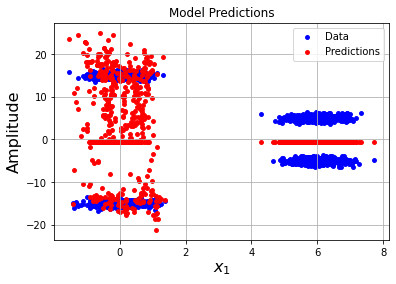

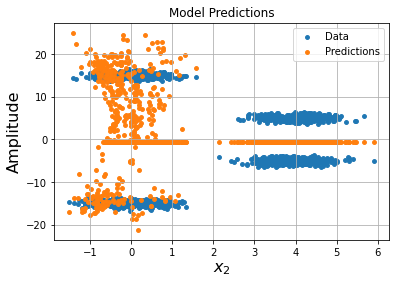

In [47]:
fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], labels, label='Data')
ax.scatter(X[:, 0], X[:, 1], f_mu, label='Predictions')
plt.grid()
plt.title('Model output', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

plt.subplots(2)
plt.figure()
plt.scatter(X[:, 0], y, s=15, label='Data', color='b')
plt.scatter(X[:, 0], f_mu, s=15, label='Predictions', color='r')
plt.title('Model Predictions')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.scatter(X[:, 1], y, s=15, label='Data')
plt.scatter(X[:, 1], f_mu, s=15, label='Predictions')
plt.title('Model Predictions')
plt.xlabel('$x_2$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.show()

/var/folders/j0/m3t4l9gx39l1t4djrcsyb3h80000gn/T/ipykernel_1409/2421922053.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #, auto_add_to_figure=False)


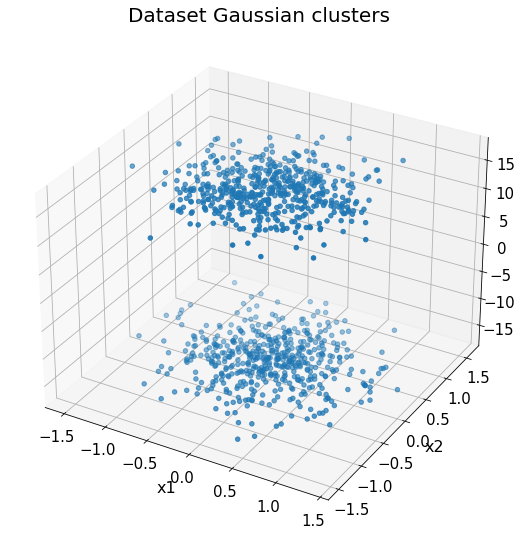

In [18]:
#center_locations = [[8, 8], [8, 4], [2, 8], [2, 4]]
center_locations = [[0, 0], [4, 6]]
X, y_true = make_blobs(n_samples=2000, centers=center_locations,
                       cluster_std=0.50, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X).predict(X)

# Create gaussian distributed labels
mu = [-5, 5, -15, 15]
sigma = [0.5, 0.5, 0.5, 0.5]

labels = labels.astype(float)
labels0 = np.where(labels==0)[0]
labels1 = np.where(labels==1)[0]

assert len(labels0) == len(labels1), 'Error : Clusters do not have the same number of samples'
n = len(labels0)

size1 = labels0[0:int(n/2)]
size2 = labels0[int(n/2):n]
size3 = labels1[0:int(n/2)]
size4 = labels1[int(n/2):n]

s1 = np.random.normal(loc=mu[0], scale=sigma[0], size=len(size1))
s2 = np.random.normal(mu[1], sigma[1], len(size2))
s3 = np.random.normal(mu[2], sigma[2], len(size3))
s4 = np.random.normal(mu[3], sigma[3], len(size4))

#replace categorical labels with distribution
labels[size1] = s1
labels[size2] = s2
labels[size3] = s3
labels[size4] = s4

# plot 3D scatter data.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,7))
ax = Axes3D(fig) #, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[labels1, 0], X[labels1, 1], labels[labels1])
plt.grid()
plt.title('Dataset Gaussian clusters', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.show()

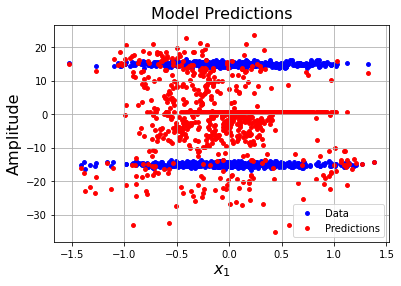

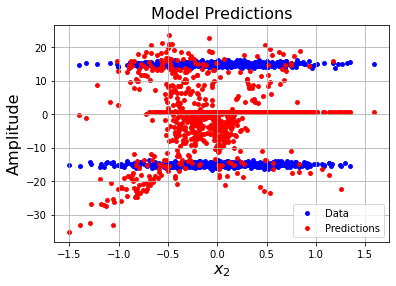

In [28]:
xx = X[labels1,:].copy()
x = torch.from_numpy(xx)
y = torch.from_numpy(labels[labels1])

x = x.float()
y = y.float()

f_mu, f_var = la(x)
mse = mse_loss(f_mu, y_train.squeeze().float())

f_mu = f_mu.squeeze().detach().numpy()

plt.figure()
plt.scatter(x[:, 0], y, s=15, label='Data', color='b')
plt.scatter(x[:, 0], f_mu, s=15, label='Predictions', color='r')
plt.title('Model Predictions', fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('PredLaplace1')
plt.show()

plt.figure()
plt.scatter(x[:, 1], y, s=15, label='Data', color='b')
plt.scatter(x[:, 1], f_mu, s=15, label='Predictions', color='r')
plt.title('Model Predictions', fontsize=16)
plt.xlabel('$x_2$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('PredLaplace2')
plt.show()

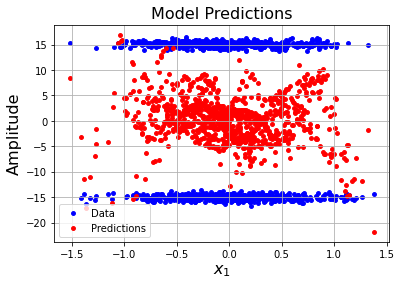

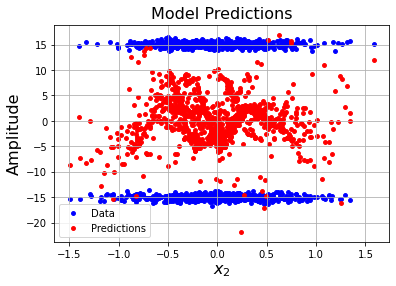

In [29]:
xx = X[labels1,:].copy()
x = torch.from_numpy(xx)
y = torch.from_numpy(labels[labels1])

x = x.float()
y = y.float()

f_mu = FFNN(x)
mse = mse_loss(f_mu, y_train.squeeze().float())

f_mu = f_mu.squeeze().detach().numpy()

plt.figure()
plt.scatter(x[:, 0], y, s=15, label='Data', color='b')
plt.scatter(x[:, 0], f_mu, s=15, label='Predictions', color='r')
plt.title('Model Predictions', fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('FFNN1')
plt.show()

plt.figure()
plt.scatter(x[:, 1], y, s=15, label='Data', color='b')
plt.scatter(x[:, 1], f_mu, s=15, label='Predictions', color='r')
plt.title('Model Predictions', fontsize=16)
plt.xlabel('$x_2$', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('FFNN2')
plt.show()